#  5.1 SLIC

In [1]:
import cv2
import numpy as np
from skimage.color import label2rgb
import matplotlib.pyplot as plt


class SLICSegmentation:
    def __init__(self, image_path, color_space='Lab'):
        self.image_path = image_path
        self.color_space = color_space
        self.image = self.load_image()
        self.labels = None
        self.centers = None

    def load_image(self):
        image = cv2.imread(self.image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.color_space == 'Lab':
            image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
        return image

    def intialize_centers(self, k):
        rows, cols, _ = self.image.shape
        step = int(np.sqrt((rows * cols) / k))  
        centers = []
        for r in range(step // 2, rows, step):
            for c in range(step // 2, cols, step):
                centers.append([r, c, *self.image[r, c]])
        self.centers = np.array(centers)

    def calculate_distance(self, cluster_center, pixel, compactness):
        color_distance = np.linalg.norm(self.image[pixel[0], pixel[1]] - cluster_center[2:])
        spatial_distance = np.linalg.norm(np.array([pixel[0], pixel[1]]) - cluster_center[:2])
        return np.sqrt(color_distance**2 + (spatial_distance / compactness)**2)

    def pixel_assign(self, compactness):
        rows, cols, _ = self.image.shape
        labels = np.full((rows, cols), -1)
        distances = np.full((rows, cols), np.inf)

        for i, center in enumerate(self.centers):
            r_start, r_end = max(0, int(center[0] - compactness)), min(rows, int(center[0] + compactness))
            c_start, c_end = max(0, int(center[1] - compactness)), min(cols, int(center[1] + compactness))

            for r in range(r_start, r_end):
                for c in range(c_start, c_end):
                    dist = self.calculate_distance(center, (r, c), compactness)
                    if dist < distances[r, c]:
                        distances[r, c] = dist
                        labels[r, c] = i
        self.labels = labels

    def update_centers(self):
        new_centers = []
        for i in range(len(self.centers)):
            mask = (self.labels == i)
            if np.any(mask):
                y_coords, x_coords = np.where(mask)
                new_center = [np.mean(y_coords),np.mean(x_coords),*np.mean(self.image[mask], axis=0)]
                new_centers.append(new_center)
        self.centers = np.array(new_centers)

    def slic(self, k, compactness, max_iterations=10):
        self.intialize_centers(k)
        for iteration in range(max_iterations):
            print(f"Iteration {iteration + 1}/{max_iterations}...")
            self.pixel_assign(compactness)
            self.update_centers()
            self.visualize_segmentation(f"Iteration {iteration + 1}")

        print("SLIC done!")

    def visualize_segmentation(self, title=" Result"):
        segmented_image = label2rgb(self.labels, self.image, kind='avg')
        plt.figure()
        plt.title(title)
        plt.imshow(segmented_image)
        plt.axis('off')
        plt.show()

Iteration 1/5...


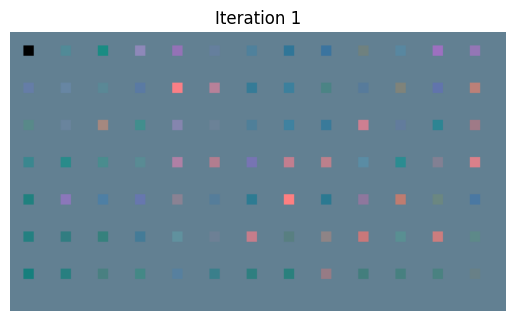

Iteration 2/5...


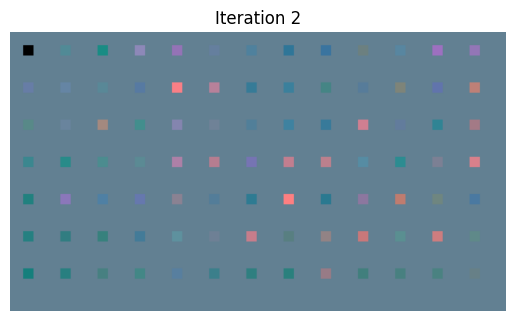

Iteration 3/5...


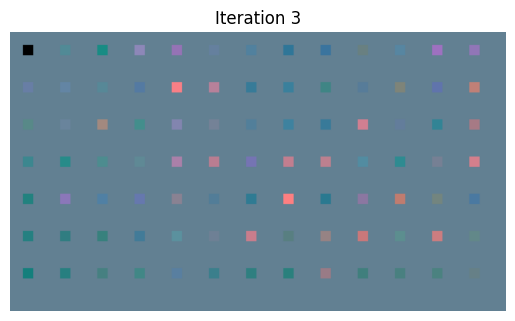

Iteration 4/5...


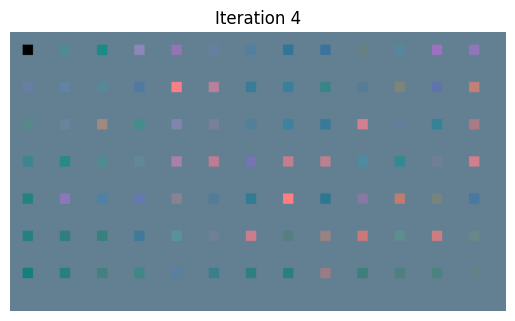

Iteration 5/5...


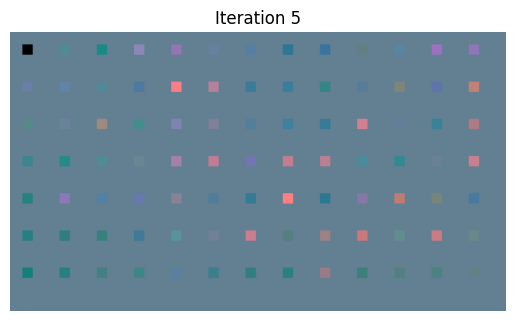

SLIC done!


In [3]:
image_path = "frame_0000.jpg"  
slic_segmenter = SLICSegmentation(image_path, color_space='Lab')

k = 100 
compactness = 20  

slic_segmenter.slic(k, compactness, max_iterations=5)

Iteration 1/5...


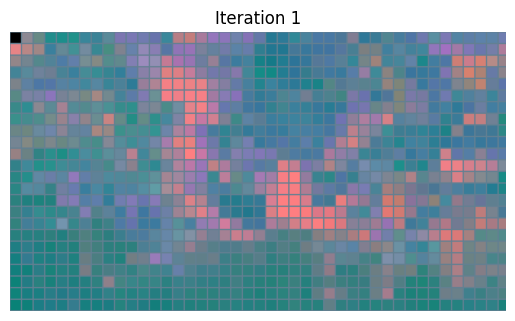

Iteration 2/5...


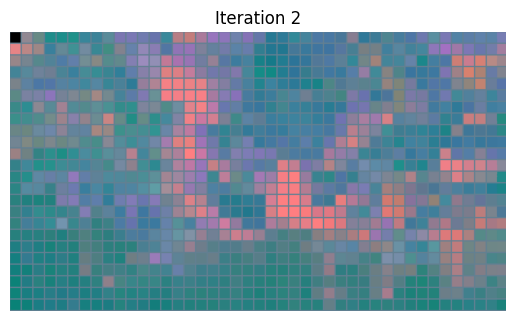

Iteration 3/5...


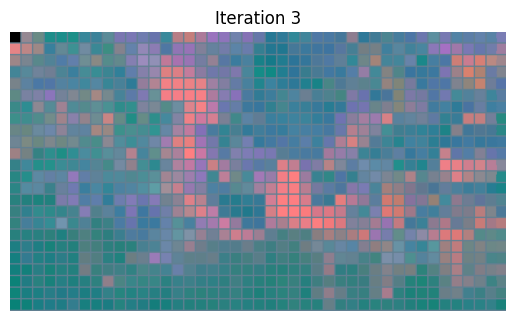

Iteration 4/5...


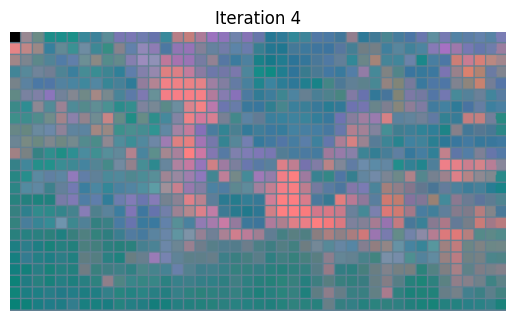

Iteration 5/5...


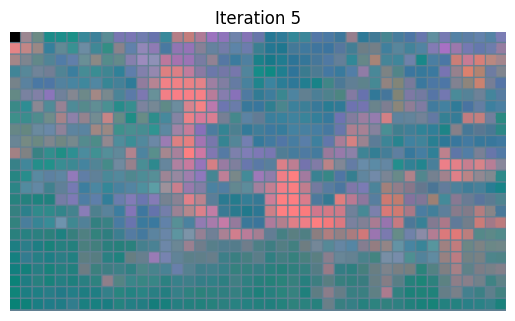

SLIC done!


In [4]:
image_path = "frame_0000.jpg"  
slic_segmenter = SLICSegmentation(image_path, color_space='Lab')

k = 1000 
compactness = 20  

slic_segmenter.slic(k, compactness, max_iterations=5)

Iteration 1/5...


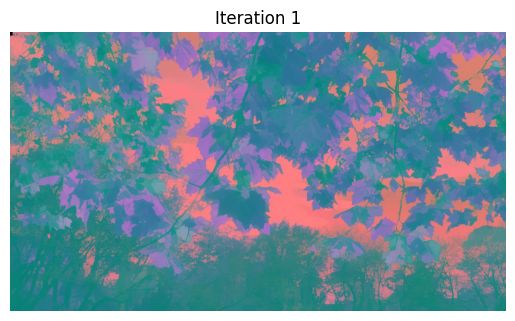

Iteration 2/5...


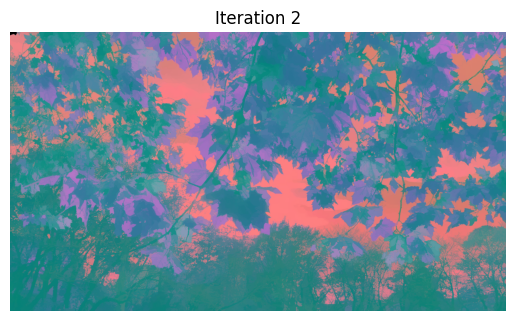

Iteration 3/5...


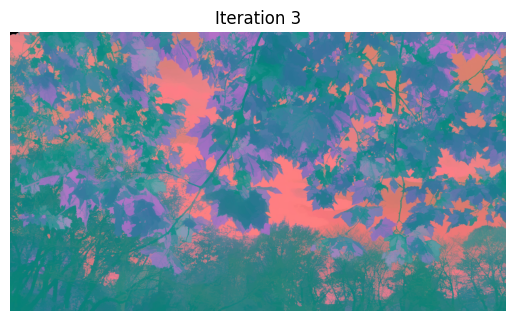

Iteration 4/5...


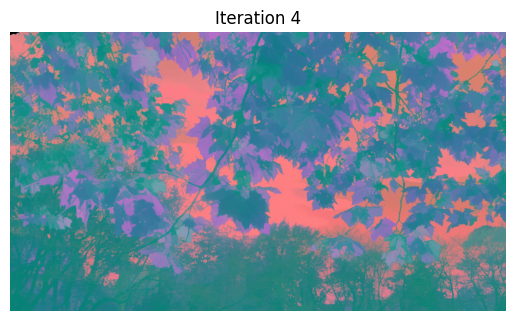

Iteration 5/5...


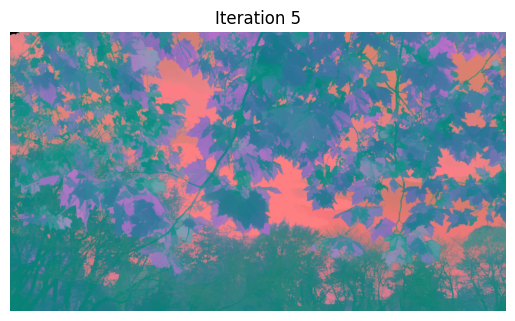

SLIC done!


In [7]:
image_path = "frame_0000.jpg"  
slic_segmenter = SLICSegmentation(image_path, color_space='Lab')

k = 5000 
compactness = 20  

slic_segmenter.slic(k, compactness, max_iterations=5)


Using RGB space instead of Lab

Iteration 1/5...


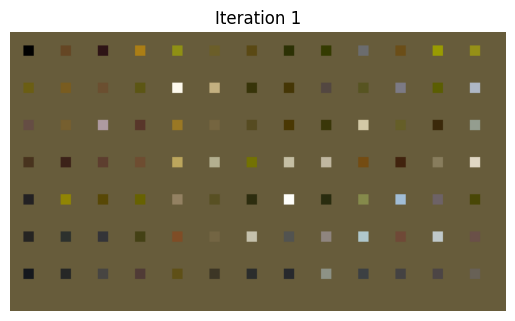

Iteration 2/5...


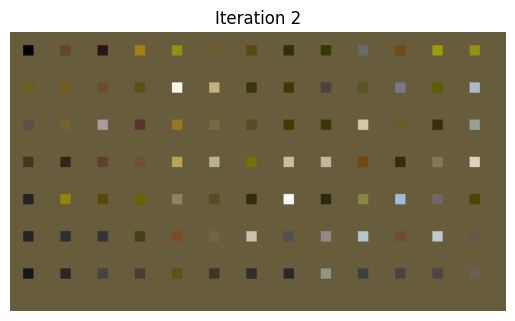

Iteration 3/5...


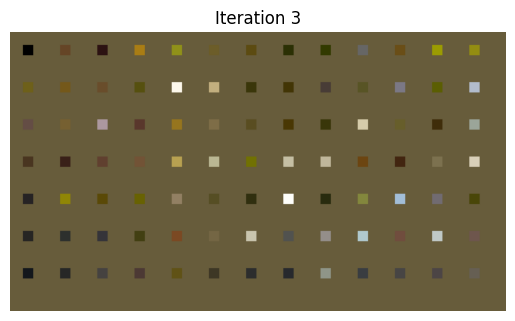

Iteration 4/5...


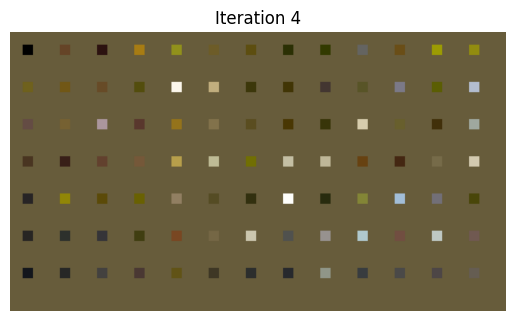

Iteration 5/5...


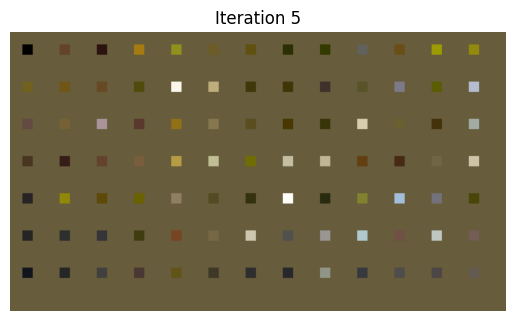

SLIC done!


In [5]:
image_path = "frame_0000.jpg"
slic_segmenter = SLICSegmentation(image_path, color_space='RGB')
    
k = 100 
compactness = 20 

slic_segmenter.slic(k, compactness, max_iterations=5)

Iteration 1/5...


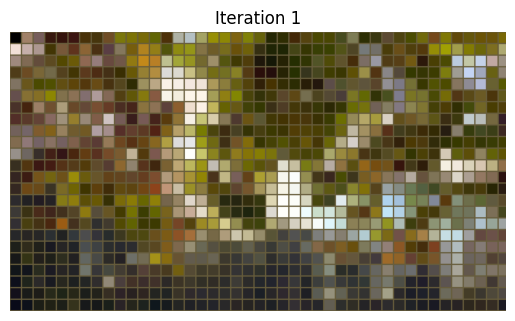

Iteration 2/5...


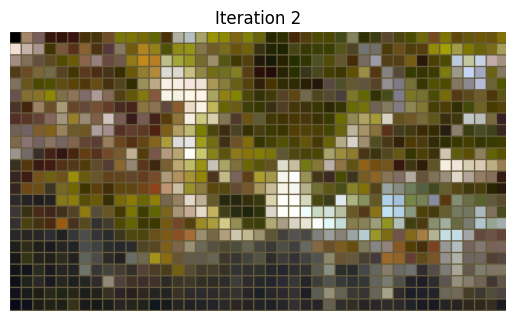

Iteration 3/5...


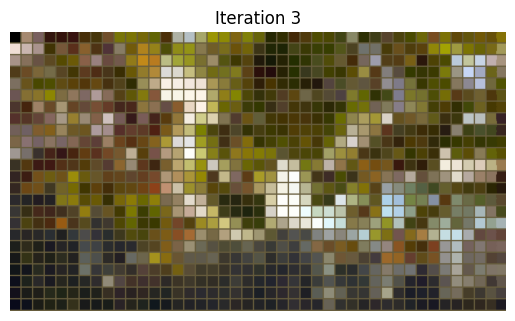

Iteration 4/5...


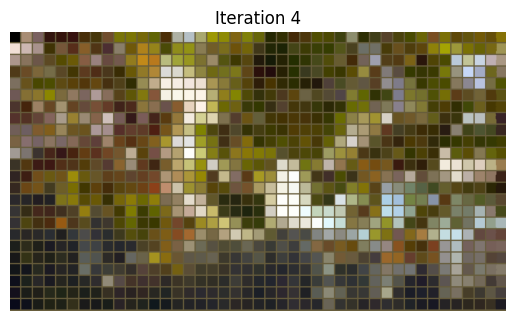

Iteration 5/5...


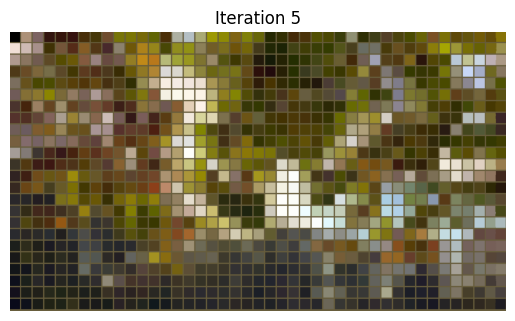

SLIC done!


In [6]:
image_path = "frame_0000.jpg"
slic_segmenter = SLICSegmentation(image_path, color_space='RGB')
    
k = 1000 
compactness = 20 

slic_segmenter.slic(k, compactness, max_iterations=5)

Iteration 1/5...


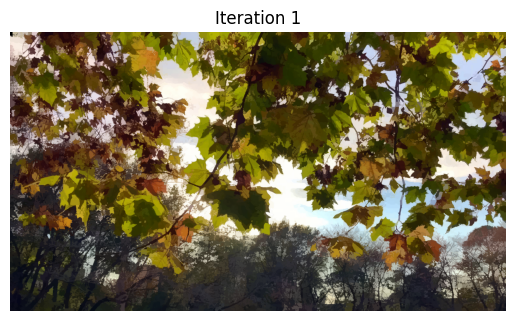

Iteration 2/5...


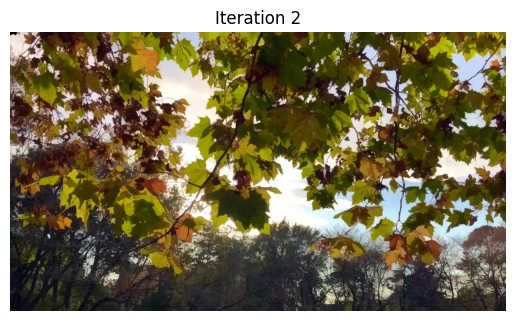

Iteration 3/5...


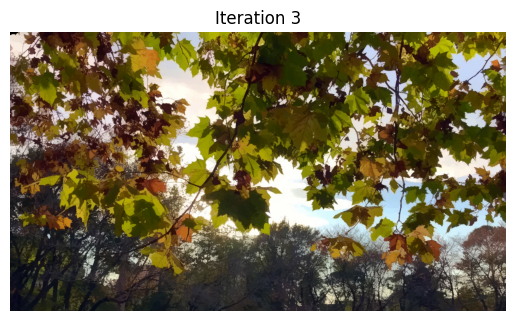

Iteration 4/5...


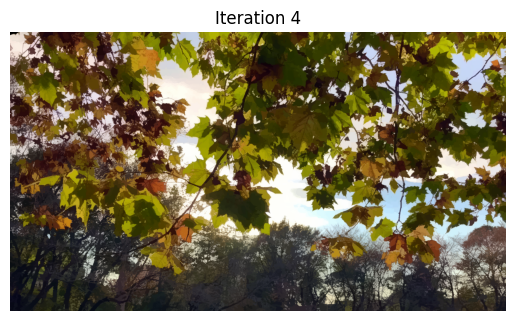

Iteration 5/5...


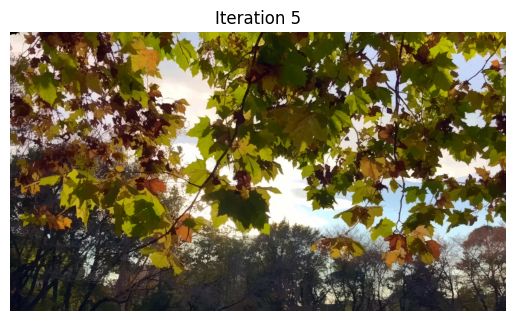

SLIC done!


In [ ]:
image_path = "frame_0000.jpg"
slic_segmenter = SLICSegmentation(image_path, color_space='RGB')
    
k = 5000 
compactness = 20 

slic_segmenter.slic(k, compactness, max_iterations=5)


Iteration 1/1...


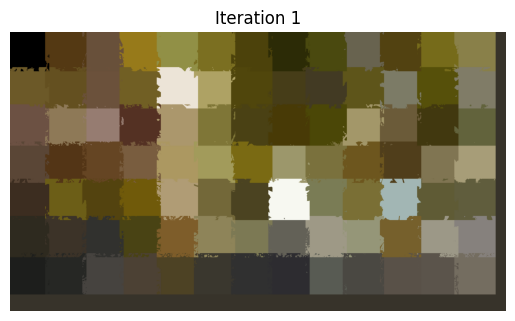

SLIC done!


In [7]:
image_path = "frame_0000.jpg"
slic_segmenter = SLICSegmentation(image_path, color_space='RGB')
    
k = 100 
compactness = 80 

slic_segmenter.slic(k, compactness, max_iterations=1)

Iteration 1/1...


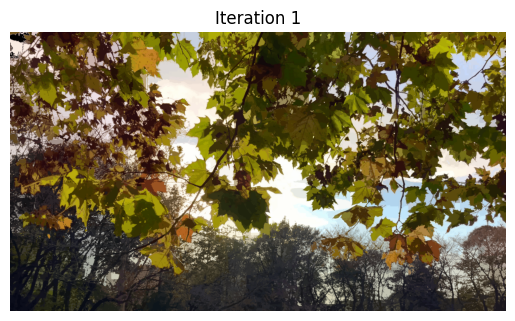

SLIC done!


In [8]:
image_path = "frame_0000.jpg"
slic_segmenter = SLICSegmentation(image_path, color_space='RGB')
    
k = 1000 
compactness = 80 

slic_segmenter.slic(k, compactness, max_iterations=1)

Iteration 1/1...


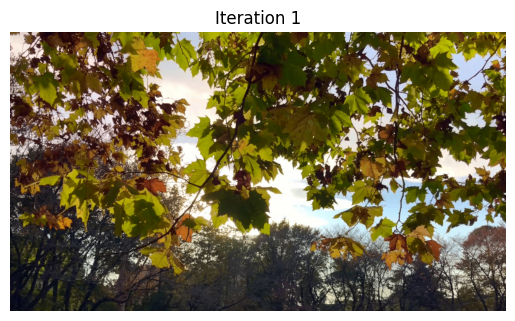

SLIC done!


In [9]:
image_path = "frame_0000.jpg"
slic_segmenter = SLICSegmentation(image_path, color_space='RGB')
    
k = 5000 
compactness = 80 

slic_segmenter.slic(k, compactness, max_iterations=1)

# 5.2 Video Segmentation with SLIC

In [9]:
import cv2
import numpy as np
from skimage.color import label2rgb
import os

frame_paths = [f'frames/frame_00{i}.jpg' for i in range(65, 76)]
processed_frames = []

for frame_path in frame_paths:
    slic = SLICSegmentation(frame_path)

    print(f"Processing {frame_path}...")
    slic.slic(k=10000, compactness=30, max_iterations=10)

    segmented_image = label2rgb(slic.labels, slic.image, kind='avg')
    if slic.color_space == 'Lab':
        segmented_image = cv2.cvtColor(np.uint8(segmented_image), cv2.COLOR_Lab2RGB)

    output_path = frame_path.replace('frames/', 'processed_frames/')
    os.makedirs('processed_frames', exist_ok=True)
    cv2.imwrite(output_path, cv2.cvtColor(np.uint8(segmented_image), cv2.COLOR_RGB2BGR))
    processed_frames.append(output_path)

def create_video(frame_paths, output_video_path, fps):
    if not frame_paths:
        print("No frames to create a video.")
        return

    first_frame = cv2.imread(frame_paths[0])
    height, width, layers = first_frame.shape
    frame_size = (width, height)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
    out = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

    for frame_path in frame_paths:
        frame = cv2.imread(frame_path)
        out.write(frame)  

    out.release()
    print(f"Video saved to {output_video_path}")

output_video_path = "segmented_output.mp4"
fps = 10
create_video(processed_frames, output_video_path, fps)

Processing frames/frame_0065.jpg...
Iteration 1/10...
Iteration 2/10...
Iteration 3/10...
Iteration 4/10...
Iteration 5/10...
Iteration 6/10...
Iteration 7/10...
Iteration 8/10...
Iteration 9/10...
Iteration 10/10...
SLIC Segmentation complete!
Processing frames/frame_0066.jpg...
Iteration 1/10...
Iteration 2/10...
Iteration 3/10...
Iteration 4/10...
Iteration 5/10...
Iteration 6/10...
Iteration 7/10...
Iteration 8/10...
Iteration 9/10...
Iteration 10/10...
SLIC Segmentation complete!
Processing frames/frame_0067.jpg...
Iteration 1/10...
Iteration 2/10...
Iteration 3/10...
Iteration 4/10...
Iteration 5/10...
Iteration 6/10...
Iteration 7/10...
Iteration 8/10...
Iteration 9/10...
Iteration 10/10...
SLIC Segmentation complete!
Processing frames/frame_0068.jpg...
Iteration 1/10...
Iteration 2/10...
Iteration 3/10...
Iteration 4/10...
Iteration 5/10...
Iteration 6/10...
Iteration 7/10...
Iteration 8/10...
Iteration 9/10...
Iteration 10/10...
SLIC Segmentation complete!
Processing frames/fr

# 5.3 Optimizing the video segmentation

In [2]:
import cv2
import numpy as np
from skimage.color import label2rgb
import os

class Opt_SLICSegmentation:
    def __init__(self, image_path, prev_centers=None):
        self.image = cv2.imread(image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.labels = None
        self.centers = prev_centers
        self.iterations_used = 0

    def initialize_centers(self, k):
        if self.centers is not None:
            if len(self.centers) == k:
                return
                
        rows, cols, _ = self.image.shape
        step = int(np.sqrt((rows * cols) / k))
        centers = []

        for r in range(step // 2, rows, step):
            for c in range(step // 2, cols, step):
                centers.append([r, c, *self.image[r, c]])

        self.centers = np.array(centers)

    def calculate_distance(self, cluster_center, pixel, compactness):
        color_distance = np.linalg.norm(self.image[pixel[0], pixel[1]] - cluster_center[2:])
        spatial_distance = np.linalg.norm(np.array([pixel[0], pixel[1]]) - cluster_center[:2])
        return np.sqrt(color_distance**2 + (spatial_distance / compactness)**2)

    def pixel_assign(self, compactness):
        rows, cols, _ = self.image.shape
        labels = np.full((rows, cols), -1)
        distances = np.full((rows, cols), np.inf)

        for i, center in enumerate(self.centers):
            r_start, r_end = max(0, int(center[0] - compactness)), min(rows, int(center[0] + compactness))
            c_start, c_end = max(0, int(center[1] - compactness)), min(cols, int(center[1] + compactness))

            for r in range(r_start, r_end):
                for c in range(c_start, c_end):
                    dist = self.calculate_distance(center, (r, c), compactness)
                    if dist < distances[r, c]:
                        distances[r, c] = dist
                        labels[r, c] = i
        
        self.labels = labels

    def update_centers(self):
        old_centers = self.centers.copy()
        new_centers = []
        for i in range(len(self.centers)):
            mask = (self.labels == i)
            if np.any(mask):
                y_coords, x_coords = np.where(mask)
                new_center = [np.mean(y_coords), np.mean(x_coords), *np.mean(self.image[mask], axis=0)]
                new_centers.append(new_center)

        self.centers = np.array(new_centers)
        movement = np.mean(np.linalg.norm(self.centers[:, :2] - old_centers[:, :2], axis=1))
        return movement

    def slic(self, k, compactness, max_iterations):
        self.initialize_centers(k)
        convergence_threshold = 0.1

        for iteration in range(max_iterations):
            print(f"Iteration {iteration + 1}/{max_iterations}...")
            self.pixel_assign(compactness)
            movement = self.update_centers()
            self.iterations_used = iteration + 1
            
            if movement < convergence_threshold:
                print(f"Converged after {iteration + 1} iterations")
                break

        print("Opt-SLIC done!")
        return self.centers


def frame_diff(prev_image, curr_image):
    frame_diff = np.mean(np.abs(curr_image.astype(np.float32) - prev_image.astype(np.float32)))
    return frame_diff


frame_paths = [f'frames/frame_00{i}.jpg' for i in range(65, 76)]
processed_frames = []

previous_centers = None
previous_image = None
previous_labels = None
change_threshold = 5.0

for i, frame_path in enumerate(frame_paths):
    slic_seg = Opt_SLICSegmentation(frame_path, previous_centers)

    if i == 0:
        previous_centers = slic_seg.slic(k=5000, compactness=50, max_iterations=5)
    else:
        diff = frame_diff(previous_image, slic_seg.image)
        
        if diff > change_threshold:
            previous_centers = slic_seg.slic(k=5000, compactness=50, max_iterations=3)
        else:
            slic_seg.labels = previous_labels

    segmented_image = label2rgb(slic_seg.labels, slic_seg.image, kind='avg')

    output_path = frame_path.replace('frames/', 'optimal_frames/')
    os.makedirs('optimal_frames', exist_ok=True)
    cv2.imwrite(output_path, cv2.cvtColor(np.uint8(segmented_image), cv2.COLOR_RGB2BGR))
    processed_frames.append(output_path)

    previous_labels = slic_seg.labels
    previous_image = slic_seg.image


def create_video(frame_paths, output_video_path, fps):
    if not frame_paths:
        return

    first_frame = cv2.imread(frame_paths[0])
    height, width, layers = first_frame.shape
    frame_size = (width, height)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

    for frame_path in frame_paths:
        frame = cv2.imread(frame_path)
        out.write(frame)

    out.release()


output_video_path = "optimal_segmented_output.mp4"
fps = 10
create_video(processed_frames, output_video_path, fps)

Iteration 1/5...
Iteration 2/5...
Iteration 3/5...
Iteration 4/5...
Iteration 5/5...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
Iteration 1/3...
Iteration 2/3...
Iteration 3/3...
Opt-SLIC done!
